In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from numpy import random
from scipy.stats import poisson

import collections
from collections import defaultdict

from scipy.special import factorial

import seaborn as sns


%matplotlib inline

In [21]:
data = pd.read_csv('results.csv')

data

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
42894,10/14/2021,Argentina,Peru,1,0,FIFA World Cup qualification,Buenos Aires,Argentina,False
42895,10/14/2021,Brazil,Uruguay,4,1,FIFA World Cup qualification,Manaus,Brazil,False
42896,10/14/2021,Chile,Venezuela,3,0,FIFA World Cup qualification,Santiago,Chile,False
42897,10/16/2021,India,Nepal,3,0,SAFF Cup,Malé,Maldives,True


### List of EU countries that we consider to be in the EU region

In [22]:
eu_countries = ['Austria',
                'Belgium',
                'Belgian Congo',
                'Bulgaria',
                'Bohemia',
                'Bohemia and Moravia',
                'Bosnia and Herzegovina',
                'British Guyana',
                'British Virgin Islands',
                'Croatia',
                'Cyprus',
                'Czech Republic',
                'Czechoslovakia',
                'Denmark',
                'England',
                'Éire',
                'Estonia',
                'Finland',
                'France',
                'French Guiana',
                'French Polynesia',
                'French Somaliland',
                'Germany',
                'German DR',
                'Greece',
                'Hungary',
                'Ireland',
                'Irish Free State',
                'Isle of Man',
                'Italy',
                'Latvia',
                'Liechtenstein',
                'Lithuania',
                'Luxembourg',
                'Malta',
                'Montenegro',
                'Montserrat',
                'Netherlands',
                'Netherlands Antilles',
                'Netherlands Guyana',
                'New Caledonia',
                'Poland',
                'Portugal',
                'Portuguese Guinea',
                'Romania',
                'Réunion',
                'Republic of Ireland',
                'Scotland',
                'Slovakia',
                'Slovenia',
                'Saarland',
                'Switzerland',
                'Spain',
                'Serbia',
                'Serbia and Montenegro',
                'Sint Maarten',
                'Sweden',
                'French Guiana',
                'Gibraltar',
                'Guadeloupe',
                'Madeira',
                'Norway',
                'Martinique',
                'North Macedonia',
                'Northern Cyprus',
                'Northern Ireland',
                'Mayotte',
                'Réunion',
                'Saint Martin',
                'Wales',
                'Yugoslavia',
                ]

In [23]:
len(eu_countries)

71

In [24]:
data.describe()

,home_score,away_score
count,42899.000000,42899.00000
mean,1.742395,1.18427
std,1.751472,1.40145
min,0.000000,0.00000
25%,1.000000,0.00000
50%,1.000000,1.00000
75%,2.000000,2.00000
max,31.000000,21.00000


In [25]:
data.isnull().values.any()

False

#### We see that there are no null values in any on the numerical or categorical columns.

#### Now we convert the column 'home_team' and 'away_team' into respective regions where, if country belongs to EU then region = 'eu' else 'noneu' in new coulmns home and away region.

In [26]:
data['home_check'] = data['home_team'].isin(eu_countries)
data['away_check'] = data['away_team'].isin(eu_countries)

In [27]:
pd.options.mode.chained_assignment = None  # default='warn'

df = data[
            ((data['home_check'] == True) & (data['away_check'] == False)) | 
            ((data['home_check'] == False) & (data['away_check'] == True))
         ]

df['eu_score'] = df.apply(lambda x: x['home_score'] if x['home_check'] == True else x['away_score'], axis=1)

df['non_eu_score'] = df.apply(lambda x: x['home_score'] if x['home_check'] == False else x['away_score'], axis=1)

df['score_diff'] = (df['eu_score'] - df['non_eu_score'])

df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_check,away_check,eu_score,non_eu_score,score_diff
61,1888-09-19,Scotland,Canada,4,0,Friendly,Glasgow,Scotland,False,True,False,4,0,4
312,2/10/1912,France,Catalonia,7,0,Friendly,Paris,France,False,True,False,7,0,7
334,7/3/1912,Norway,Russia,2,1,Friendly,Stockholm,Sweden,True,True,False,2,1,1
336,7/12/1912,Russia,Hungary,0,9,Friendly,Moscow,Russia,False,False,True,9,0,9
337,7/14/1912,Russia,Hungary,0,12,Friendly,Moscow,Russia,False,False,True,12,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42867,10/12/2021,Kazakhstan,Finland,0,2,FIFA World Cup qualification,Nur-Sultan,Kazakhstan,False,False,True,2,0,2
42868,10/12/2021,Ukraine,Bosnia and Herzegovina,1,1,FIFA World Cup qualification,Lviv,Ukraine,False,False,True,1,1,0
42869,10/12/2021,Faroe Islands,Scotland,0,1,FIFA World Cup qualification,Tórshavn,Faroe Islands,False,False,True,1,0,1
42873,10/12/2021,Albania,Poland,0,1,FIFA World Cup qualification,Tirana,Albania,False,False,True,1,0,1


In [28]:
df.describe()

,home_score,away_score,eu_score,non_eu_score,score_diff
count,7031.000000,7031.000000,7031.000000,7031.000000,7031.000000
mean,1.683687,1.241929,1.745840,1.179775,0.566065
std,1.755808,1.434461,1.778919,1.383235,2.446034
min,0.000000,0.000000,0.000000,0.000000,-17.000000
25%,0.000000,0.000000,1.000000,0.000000,-1.000000
50%,1.000000,1.000000,1.000000,1.000000,0.000000
75%,2.000000,2.000000,2.000000,2.000000,2.000000
max,19.000000,18.000000,19.000000,17.000000,19.000000


In [29]:
df_eu_mean = df['eu_score'].mean()
df_eu_var = df['eu_score'].var()
df_non_eu_mean = df['non_eu_score'].mean()
df_non_eu_var = df['non_eu_score'].var()
df_diff_mean = df['score_diff'].mean()
df_diff_var = df['score_diff'].var()

Just like F1 drivers with lots of points have a higher chance of winning, teams that have been higher scorers in the past have a greater likelihood of scoring goals in the future.

We can treat the number of goals scored by the home and away team as two independent Poisson distributions.

Note that we consider the number of goals scored by each team to be independent events (i.e. P(A n B) = P(A) P(B)). 

The difference of two Poisson distributions is called a Skellam distribution (https://en.wikipedia.org/wiki/Skellam_distribution). 

Model the Skellam distribution of european teams playing non-european teams. Do it with an analytic approach (MOM or MLE), then with an algorithmic bayesian approach using pymc3.

Use your model to calculate the probability of a draw between a european team and a non-european team.

The probability of a draw is simply the sum of the events where the two teams score the same amount of goals.

### Let's model EU Score, Non EU score and also the differance (EU-NON EU) score using poisson distribution using MOM.


Using the MOM approach for the poisson distribution
https://ocw.mit.edu/courses/mathematics/18-443-statistics-for-applications-spring-2015/lecture-notes/MIT18_443S15_LEC3.pdf
results in the MOM estimator λ MOM = mean(X)

So we can use the mean of EU score while modelling poisson distribution on EU score and respectively mean of NON EU scores for NON EU.


#### Modelling EU & NON EU scores using Poisson distribution

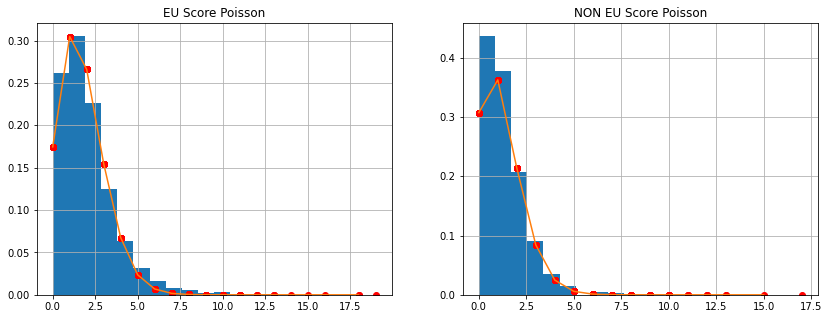

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(14,5))

t1, t2 = df['eu_score'], df['non_eu_score']
lam1, lam2 = t1.mean(), t2.mean()
dic1, dic2 = defaultdict(), defaultdict()

d1 = np.exp(-lam1)*np.power(lam1, t1)/factorial(t1)
d2 = np.exp(-lam2)*np.power(lam2, t2)/factorial(t2)

for a,b in zip(t1,d1):
    dic1[a]=b
for a,b in zip(t2,d2):
    dic2[a]=b
    
od1 = collections.OrderedDict(sorted(dic1.items())).values()
od2 = collections.OrderedDict(sorted(dic2.items())).values()


df.eu_score.hist(density=True, bins=20, ax=axes[0])
df.non_eu_score.hist(density=True, bins=20, ax=axes[1])


##Plotting the poisson distribution for each scores
axes[0].plot(t1, poisson.pmf(t1, lam1), 'ro', ms=6)
axes[1].plot(t2, poisson.pmf(t2, lam2), 'ro', ms=6)

axes[0].plot(list(od1))
axes[1].plot(list(od2))
axes[0].set_title('EU Score Poisson')
axes[1].set_title('NON EU Score Poisson')

plt.show()


### Now let's model the difference EU_Score - NON_EU_Score using a poisson distribution.

We consider the absolute value of the difference of scores to model the poisson

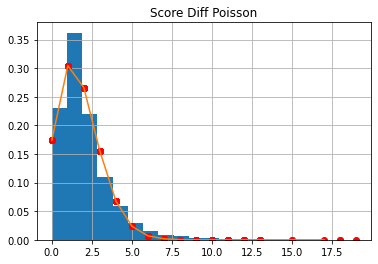

In [31]:
t = df['score_diff'].abs()

t.hist(density=True, bins=20)


l = t.mean()
d = np.exp(-l)*np.power(l, t)/factorial(t)

dic = defaultdict()
for a,b in zip(t,d):
    dic[a]=b   
od = collections.OrderedDict(sorted(dic.items())).values()
    
plt.plot(t, poisson.pmf(t, l), 'ro', ms=6)   
plt.plot(list(od))
plt.title('Score Diff Poisson')
plt.show()

## Skellam distribution

Lets model the skellam distribution on EU and NON EU using skellam

In [32]:
from scipy.stats import skellam

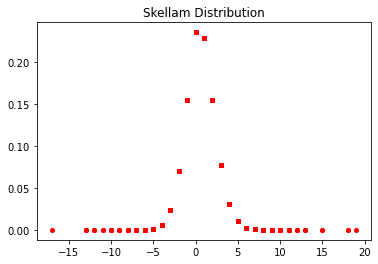

In [34]:
t = df.score_diff


#df.score_diff.hist(density=True, bins=20)
plt.plot(df['score_diff'], skellam.pmf(df['score_diff'], df_eu_mean, df_non_eu_mean), 'ro', ms=4, label='skellam pmf')



d = skellam.pmf(t, df_eu_mean, df_non_eu_mean)


plt.title('Skellam Distribution')

plt.show()

For a draw, the difference of score = 0. To esimate the probability from skellam distribution we send the value of 0 to skellam.pmf

In [43]:
print(skellam.pmf(0, df_eu_mean, df_non_eu_mean))

0.2358176816333915


0.235 is the probability of draw between EU vs NON EU